# Timer

In [1]:
import matplotlib.pyplot as plt
import timeit
from functools import partial
import random
import time

%matplotlib inline

In [2]:
def plot_runtime(fn):
    x = []
    y = []
    
    for n in range(1, 1000, 10):
        l = [random.randint(1, n) for _ in range(0, n)]
        t = timeit.Timer(partial(fn, l)).timeit(1)
        
        x.append(n)
        y.append(t)
        
    plt.plot(x, y, 'o')

In [3]:
def timefn(fn):

    def timed(*args, **kw):
        ts = time.time()
        result = fn(*args, **kw)
        te = time.time()
        runtime = te - ts
        return result, runtime

    return timed

# Insertion Sort

In [4]:
# @timefn
def insertion_sort(lst):
    for idx in range(1, len(lst)):
        key = lst[idx]
        pos = idx
        
        while pos > 0 and lst[pos - 1] > key:
            lst[pos] = lst[pos - 1]
            pos -= 1
        
        lst[pos] = key
        
    return lst

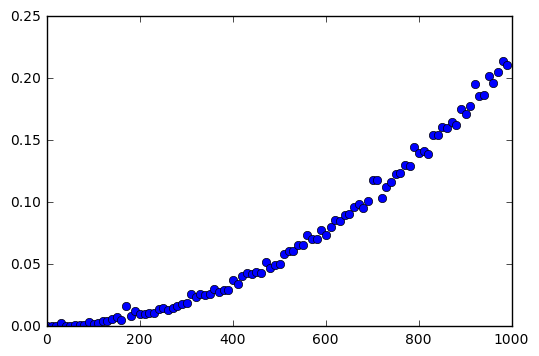

In [5]:
plot_runtime(insertion_sort)

# Mergesort

In [6]:
def merge_sort(lst):
    if len(lst)==1:
        return lst
    
    mid = len(lst) / 2
    left = lst[:mid]
    right = lst[mid:]
    
#     print left, right
    
    left = merge_sort(left)
    right = merge_sort(right)
    
    return merge_two(left, right)

def merge_two(left, right):
    tmp = []
    t_idx = 0

    l_idx = 0
    r_idx = 0
            
    while l_idx < len(left) and r_idx < len(right):
        if left[l_idx] < right[r_idx]:
            tmp.append(left[l_idx])
            l_idx +=1
        else:
            tmp.append(right[r_idx])
            r_idx +=1
        t_idx +=1
        
    if l_idx==len(left):
        tmp += right[r_idx:]
    else:
        tmp += left[l_idx:]
    
#     print 'aft merge', tmp
#     print
    
    return tmp

In [7]:
merge_sort([6,5,3,1,8,7,4,9])

[1, 3, 4, 5, 6, 7, 8, 9]

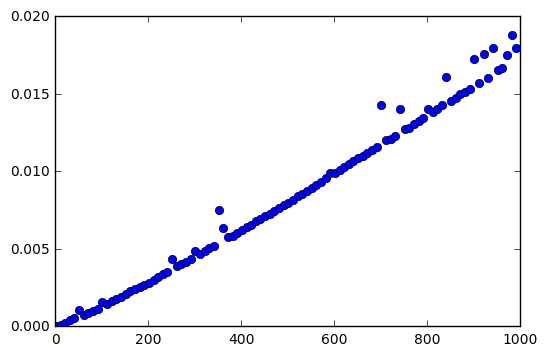

In [8]:
# import sys
# sys.setrecursionlimit(10000)

plot_runtime(merge_sort)